In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_theme()

In [3]:
df = pd.read_csv("../../data/lsms/processed/NG_2015_real.csv")

In [4]:
cons = df.cons_pc

In [5]:
def get_bins(cons):
    q25, q75 = np.percentile(cons, [25, 75])
    bin_width = 2 * (q75 - q25) * len(cons) ** (-1/3)
    bins = round((cons.max() - cons.min()) / bin_width)
    return bins

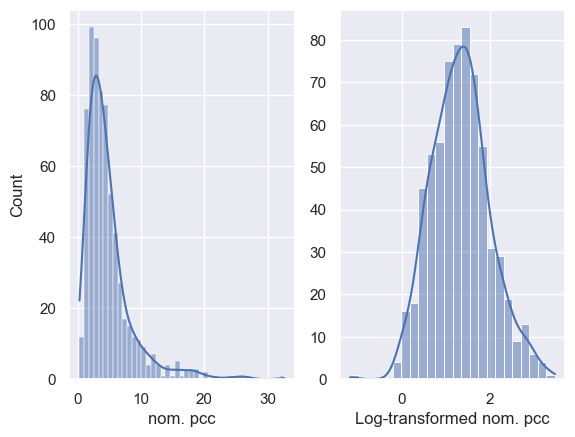

In [6]:
fig, axs = plt.subplots(ncols=2)
sns.histplot(cons, bins=get_bins(cons), kde=True, ax=axs[0])
sns.histplot(np.log(cons), bins=get_bins(np.log(cons)), kde=True, ax=axs[1])
axs[1].set_ylabel("")
axs[0].set_xlabel("nom. pcc")
axs[1].set_xlabel("Log-transformed nom. pcc")
fig.savefig("../../figs/pcc_hist.pdf", dpi=600, bbox_inches='tight')